# Veri Hazırlama

Kütüphaneler

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset, DataLoader)
from skimage import io
import time

import warnings

warnings.filterwarnings("ignore")


C:\Users\OmerYildiz\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\OmerYildiz\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


Veri

In [2]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return(image, y_label)


Veri Hazırlama

In [3]:

dataset = veri(csv_file=r"../../veriler/f1_classification/f111.csv", root_dir=r"../../veriler/f1_classification", transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize(size=(28, 28)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]))


In [4]:
dataset


Veri Ön İşleme

In [5]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)


In [6]:
train_set


In [7]:
test_set


Veri Görselleştirme

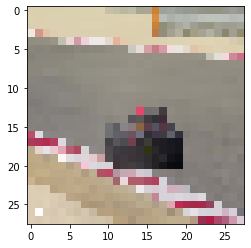

Redbull
torch.Size([1, 3, 28, 28])


In [8]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1

classes = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]


def imshow(img):

    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())


Model Mimarisini Oluşturma

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=3,  out_channels=4,  kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(
            in_channels=4,  out_channels=8,  kernel_size=(3, 3))
        self.conv3 = nn.Conv2d(
            in_channels=8,  out_channels=16, kernel_size=(2, 2))
        self.conv4 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=(2, 2))

        self.max = nn.MaxPool2d(kernel_size=(2, 2))
        self.func = nn.ELU()
        self.func1 = nn.ReLU()

        self.fullyconnect1 = nn.Linear(in_features=32, out_features=50)
        self.fullyconnect2 = nn.Linear(in_features=50, out_features=50)
        self.fullyconnect3 = nn.Linear(in_features=50, out_features=100)
        self.fullyconnect4 = nn.Linear(in_features=100, out_features=4)

    def forward(self, x):

        x = self.conv1(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv2(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv3(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv4(x)
        x = self.func(x)
        
        x = x.view(x.size(0), -1)  # flaten
        
        x = self.fullyconnect1(x)
        x = self.func(x)
        x = self.fullyconnect2(x)
        x = self.func(x)
        x = self.fullyconnect3(x)
        x = self.func(x)
        
        x = self.fullyconnect4(x)
        
        return x


Modelin Eğitimi

In [10]:
start = time.time()

model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

for i in range(epoch):
    for j, (images, label) in enumerate(train_loader):

        optimizer.zero_grad()
        out = model(images)
        loss = error(out, label)

        loss.backward()
        optimizer.step()

        print("Epoch [{}/{}, loss:{:.4f}]".format(i+1, j+1, loss.item()))

end = time.time()
print("Süre", end-start)


Epoch [1/1, loss:1.4511]
Epoch [1/2, loss:1.2870]
Epoch [1/3, loss:1.3816]
Epoch [1/4, loss:1.4513]
Epoch [1/5, loss:1.4460]
Epoch [1/6, loss:1.4323]
Epoch [1/7, loss:1.4112]
Epoch [1/8, loss:1.5552]
Epoch [1/9, loss:1.2908]
Epoch [1/10, loss:1.3449]
Epoch [1/11, loss:1.2931]
Epoch [1/12, loss:1.2904]
Epoch [1/13, loss:1.3513]
Epoch [1/14, loss:1.5826]
Epoch [1/15, loss:1.5864]
Epoch [1/16, loss:1.3512]
Epoch [1/17, loss:1.2804]
Epoch [1/18, loss:1.3446]
Epoch [1/19, loss:1.5743]
Epoch [1/20, loss:1.3769]
Epoch [1/21, loss:1.5697]
Epoch [1/22, loss:1.5632]
Epoch [1/23, loss:1.2833]
Epoch [1/24, loss:1.2897]
Epoch [1/25, loss:1.2789]
Epoch [1/26, loss:1.5367]
Epoch [1/27, loss:1.5294]
Epoch [1/28, loss:1.4121]
Epoch [1/29, loss:1.5172]
Epoch [1/30, loss:1.5051]
Epoch [1/31, loss:1.3746]
Epoch [1/32, loss:1.3835]
Epoch [1/33, loss:1.4766]
Epoch [1/34, loss:1.4306]
Epoch [1/35, loss:1.4607]
Epoch [1/36, loss:1.4359]
Epoch [1/37, loss:1.4402]
Epoch [1/38, loss:1.2972]
Epoch [1/39, loss:1.2

Modelin Testi

In [11]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [12]:
print("train doğruluk:")
dogruluk(train_loader, model)

print("test doğruluk:")
dogruluk(test_loader, model)

train doğruluk:
Got 170 / 200 with accuracy 85.00
test doğruluk:
Got 59 / 79 with accuracy 74.68


Modelin Eğitim ve Testi

In [13]:
start = time.time()
model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)

        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.3918 Accuracy: 20.2532 Error: 79.7468
iteration:  200 Loss: 1.1140 Accuracy: 31.6456 Error: 68.3544
iteration:  300 Loss: 1.5378 Accuracy: 37.9747 Error: 62.0253
iteration:  400 Loss: 0.3556 Accuracy: 34.1772 Error: 65.8228
iteration:  500 Loss: 0.9338 Accuracy: 35.4430 Error: 64.5570
iteration:  600 Loss: 0.3118 Accuracy: 35.4430 Error: 64.5570
iteration:  700 Loss: 0.7210 Accuracy: 36.7089 Error: 63.2911
iteration:  800 Loss: 0.3862 Accuracy: 41.7722 Error: 58.2278
iteration:  900 Loss: 0.6880 Accuracy: 45.5696 Error: 54.4304
iteration: 1000 Loss: 0.4133 Accuracy: 48.1013 Error: 51.8987
iteration: 1100 Loss: 0.6737 Accuracy: 45.5696 Error: 54.4304
iteration: 1200 Loss: 0.4305 Accuracy: 54.4304 Error: 45.5696
iteration: 1300 Loss: 0.6634 Accuracy: 46.8354 Error: 53.1646
iteration: 1400 Loss: 0.4429 Accuracy: 54.4304 Error: 45.5696
iteration: 1500 Loss: 0.6477 Accuracy: 54.4304 Error: 45.5696
iteration: 1600 Loss: 0.4522 Accuracy: 58.2278 Error: 41.7722
iteratio

In [14]:
start = time.time()
model = Net()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)

        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.7040 Accuracy: 25.3165 Error: 74.6835
iteration:  200 Loss: 0.7971 Accuracy: 43.0380 Error: 56.9620
iteration:  300 Loss: 0.8087 Accuracy: 41.7722 Error: 58.2278
iteration:  400 Loss: 0.8850 Accuracy: 58.2278 Error: 41.7722
iteration:  500 Loss: 0.7997 Accuracy: 56.9620 Error: 43.0380
iteration:  600 Loss: 0.9987 Accuracy: 59.4937 Error: 40.5063
iteration:  700 Loss: 0.3443 Accuracy: 56.9620 Error: 43.0380
iteration:  800 Loss: 1.1185 Accuracy: 60.7595 Error: 39.2405
iteration:  900 Loss: 0.0450 Accuracy: 68.3544 Error: 31.6456
iteration: 1000 Loss: 1.0475 Accuracy: 64.5570 Error: 35.4430
iteration: 1100 Loss: 0.0008 Accuracy: 65.8228 Error: 34.1772
iteration: 1200 Loss: 1.4523 Accuracy: 65.8228 Error: 34.1772
iteration: 1300 Loss: 0.0000 Accuracy: 64.5570 Error: 35.4430
iteration: 1400 Loss: 1.6448 Accuracy: 70.8861 Error: 29.1139
iteration: 1500 Loss: 0.0001 Accuracy: 69.6203 Error: 30.3797
iteration: 1600 Loss: 1.1495 Accuracy: 64.5570 Error: 35.4430
iteratio

Model Save

In [15]:
torch.save(model,"../Model_Save/modelsave.pth") # modelin tamamı kayıt edildi
torch.save(model.state_dict(),"../Model_Save/modelstatedict.pth") # modelin ağırlıkları kayıt edildi